In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from multiprocessing import Pool

test_error_phrase = "Testing NRMSE = "
train_error_phrase = "Training NRMSE = "

def run_delay_based_RC(args):
    phi, beta, gamma = args
    
    performance = []
    for seed in range(10):
        p = subprocess.Popen(['./delay_based_RC',"-integ_step=0.01", f"-seed={seed}", "-noise_amp=0.005" ,f"-beta={beta}",f"-gamma={gamma}", f"-phi={phi}", "-num_nodes=500" ,"-theta=0.1", f"-delay=55"], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        output, err = p.communicate(b"input data that is passed to subprocess' stdin")
        output = str(output)
        
        
        nrmse_str = output.split(test_error_phrase)[1]
        nrmse_str = nrmse_str.split("\\n")[0]
        nrmse = float(nrmse_str)
        performance.append(nrmse)
    return np.mean(performance)


In [2]:
num_threads = 8
data = []
gammas = [0.5,1,1.5,2]
for gamma in gammas:
    phis = np.linspace(0, 3.3, 15)
    perf_phi = []

    beta = 0.9  # Example additional parameter
        
    # Create a list of argument tuples
    args_list = [(phi, beta, gamma) for phi in phis]

    with Pool(processes=num_threads) as pool:
        results = list(pool.imap(run_delay_based_RC, args_list))

    for result in results:
        if result is not None:
            perf_phi.append(result)
    data.append(perf_phi)

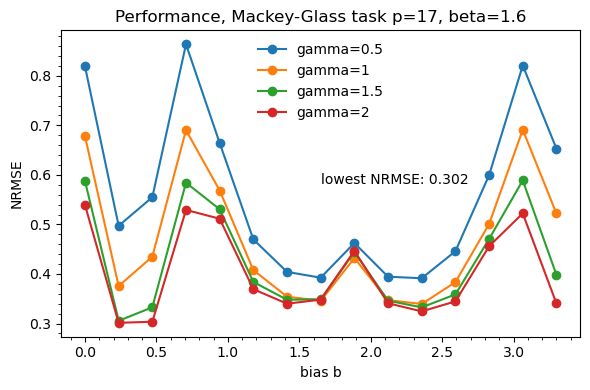

In [3]:
plt.figure(figsize=(6,4))
plt.title("Performance, Mackey-Glass task p=17, beta=1.6")
for q, gamma in enumerate(gammas):
    plt.plot(phis, data[q], marker="o", label=f"gamma={gamma}")
plt.xlabel("bias b")
plt.ylabel("NRMSE")
plt.legend(frameon=False)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.02))

#annotate the best result
plt.annotate(f"lowest NRMSE: {np.min(np.array(data)):.3f}", xy=(0.5, 0.5), xycoords='axes fraction')

plt.tight_layout()
plt.show()